<a href="https://colab.research.google.com/github/Polyneuro/github-starter-course/blob/main/Beta_binomial_Dirichlet_multinomial_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

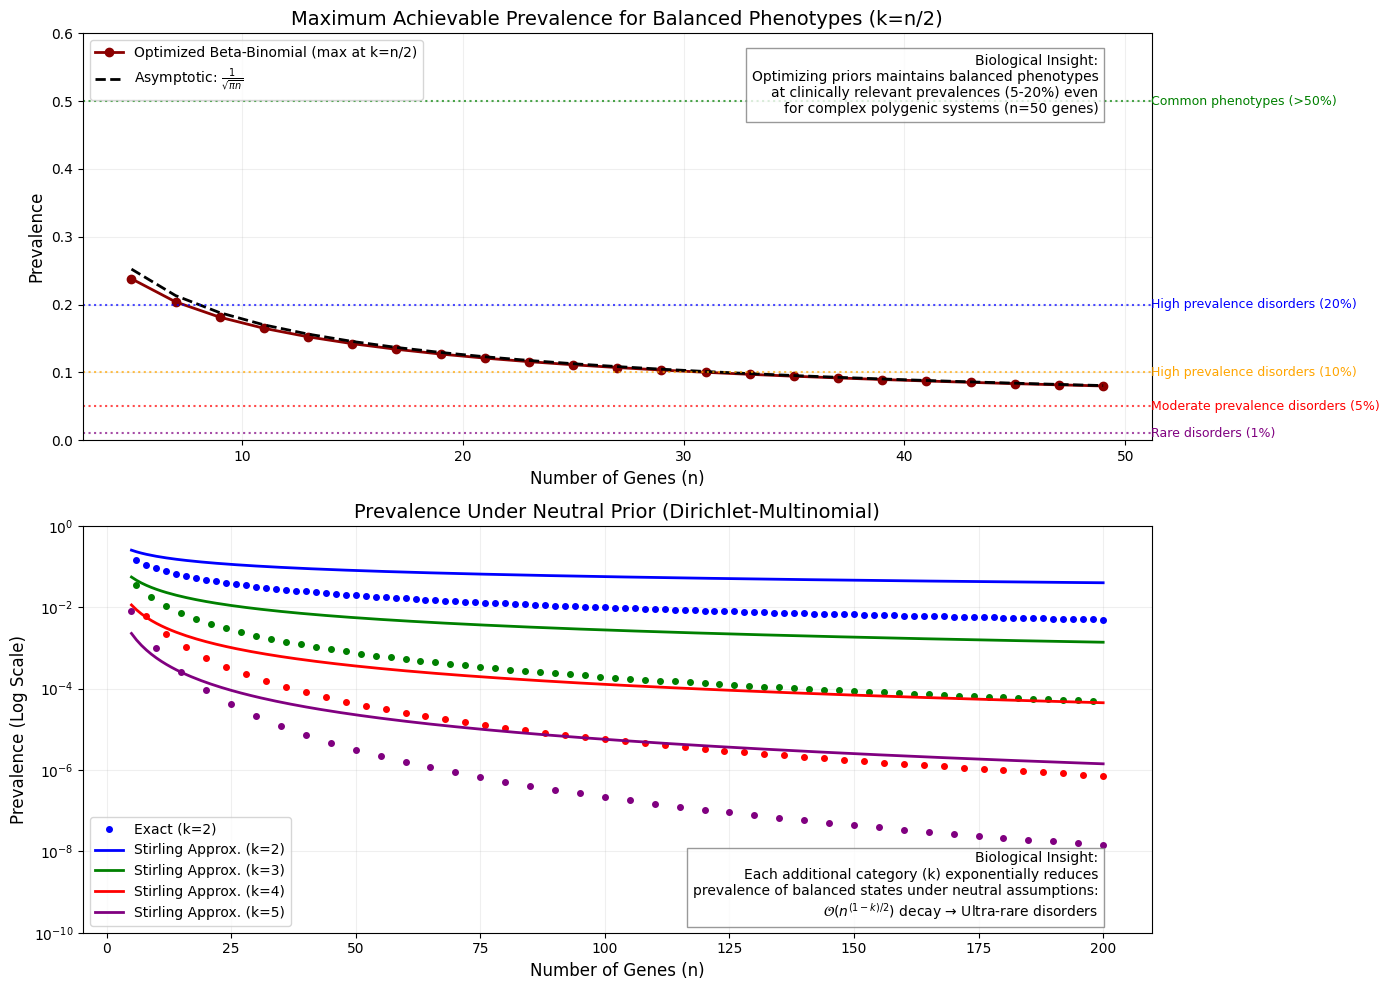


Prevalence Comparison for Binary Systems (k=2):
n	Optimized Prior	Fixed Prior	Ratio
---------------------------------------------
10	0.1800		0.0909		2.0x
20	0.1268		0.0476		2.7x
30	0.1034		0.0323		3.2x
40	0.0895		0.0244		3.7x
50	0.0800		0.0196		4.1x


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln, binom, beta
from scipy.stats import betabinom

# ==============================
# 1. CORRECTED Beta-Binomial Optimized Curve
# ==============================
def optimized_beta_binomial(n):
    """Compute maximum achievable probability at k=n/2 with optimized prior"""
    k = n // 2
    a = b = k + 1  # Optimized prior parameters

    # Direct calculation using beta-binomial PMF
    return betabinom.pmf(k, n, a, b)

# ==============================
# 2. Dirichlet-Multinomial Functions
# ==============================
def exact_dirichlet_multinomial(n, k):
    """Exact probability for balanced case with symmetric prior (α_i=1)"""
    if n % k != 0:  # Only defined when n/k is integer
        return 0
    return np.exp(gammaln(n+1) + gammaln(k) - gammaln(n+k))

def stirling_dirichlet_multinomial(n, k):
    """Stirling approximation for large n"""
    return np.sqrt(k) * (2 * np.pi * n)**((1 - k)/2)

# ==============================
# 3. Parameter Setup
# ==============================
# Gene count ranges
n_beta = np.arange(5, 51, 2)  # For beta-binomial (5-50 genes)
n_dirichlet = np.arange(5, 201)  # For Dirichlet-multinomial (5-200 genes)

# Categories
categories = [2, 3, 4, 5]

# Prevalence thresholds
thresholds = [0.5, 0.2, 0.1, 0.05, 0.01]
threshold_colors = ['green', 'blue', 'orange', 'red', 'purple']
threshold_labels = [
    'Common phenotypes (>50%)',
    'High prevalence disorders (20%)',
    'High prevalence disorders (10%)',
    'Moderate prevalence disorders (5%)',
    'Rare disorders (1%)'
]

# ==============================
# 4. Compute Data
# ==============================
# Beta-binomial optimized curve
beta_binomial_curve = [optimized_beta_binomial(int(n)) for n in n_beta]
asymptotic_curve = 1 / np.sqrt(np.pi * n_beta)

# Dirichlet-multinomial curves
dirichlet_exact = {k: [exact_dirichlet_multinomial(n, k) for n in n_dirichlet]
                   for k in categories}
dirichlet_stirling = {k: [stirling_dirichlet_multinomial(n, k) for n in n_dirichlet]
                      for k in categories}

# ==============================
# 5. Create Figure
# ==============================
plt.figure(figsize=(14, 10))

# ------------------------------
# Plot 1: Beta-Binomial Comparison
# ------------------------------
ax1 = plt.subplot(2, 1, 1)

# Plot empirical and asymptotic curves
ax1.plot(n_beta, beta_binomial_curve, 'o-', color='darkred', linewidth=2,
         label='Optimized Beta-Binomial (max at k=n/2)')
ax1.plot(n_beta, asymptotic_curve, 'k--', linewidth=2,
         label=r'Asymptotic: $\frac{1}{\sqrt{\pi n}}$')

# Add prevalence thresholds
for thresh, color, label in zip(thresholds, threshold_colors, threshold_labels):
    ax1.axhline(y=thresh, color=color, linestyle=':', alpha=0.7)
    ax1.text(51, thresh, f' {label}', va='center', fontsize=9, color=color)

ax1.set_title('Maximum Achievable Prevalence for Balanced Phenotypes (k=n/2)', fontsize=14)
ax1.set_xlabel('Number of Genes (n)', fontsize=12)
ax1.set_ylabel('Prevalence', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(alpha=0.2)
ax1.set_ylim(0, 0.6)

# Biological interpretation box
ax1.text(0.95, 0.95,
         "Biological Insight:\nOptimizing priors maintains balanced phenotypes\n"
         "at clinically relevant prevalences (5-20%) even\n"
         "for complex polygenic systems (n=50 genes)",
         transform=ax1.transAxes, ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# ------------------------------
# Plot 2: Dirichlet-Multinomial Comparison
# ------------------------------
ax2 = plt.subplot(2, 1, 2)

# Plot exact and Stirling approximations for each k
colors = ['blue', 'green', 'red', 'purple']
for i, k in enumerate(categories):
    # Exact values (only plot where defined)
    valid_n = [n for n in n_dirichlet if n % k == 0]
    valid_vals = [dirichlet_exact[k][n-5] for n in valid_n]
    ax2.plot(valid_n, valid_vals, 'o', color=colors[i], markersize=4,
             label=f'Exact (k={k})' if i==0 else None)

    # Stirling approximation
    ax2.plot(n_dirichlet, dirichlet_stirling[k], '-', color=colors[i], linewidth=2,
             label=f'Stirling Approx. (k={k})')

# Formatting
ax2.set_yscale('log')
ax2.set_title('Prevalence Under Neutral Prior (Dirichlet-Multinomial)', fontsize=14)
ax2.set_xlabel('Number of Genes (n)', fontsize=12)
ax2.set_ylabel('Prevalence (Log Scale)', fontsize=12)
ax2.legend(loc='lower left')
ax2.grid(True, which="both", ls="-", alpha=0.2)
ax2.set_ylim(1e-10, 1)

# Add biological interpretation
ax2.text(0.95, 0.20,
         "Biological Insight:\nEach additional category (k) exponentially reduces\n"
         "prevalence of balanced states under neutral assumptions:\n"
         r"$\mathcal{O}(n^{(1-k)/2})$ decay → Ultra-rare disorders",
         transform=ax2.transAxes, ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# ------------------------------
# Final Formatting
# ------------------------------
plt.tight_layout()
plt.savefig('balanced_phenotype_prevalence_comparison.png', dpi=300)
plt.show()

# ==============================
# 6. Key Comparison Table (k=2)
# ==============================
print("\nPrevalence Comparison for Binary Systems (k=2):")
print("n\tOptimized Prior\tFixed Prior\tRatio")
print("-"*45)
for n in [10, 20, 30, 40, 50]:
    opt = optimized_beta_binomial(n)
    fixed = 1/(n+1)  # Dirichlet-multinomial with k=2
    print(f"{n}\t{opt:.4f}\t\t{fixed:.4f}\t\t{opt/fixed:.1f}x")